# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

I will do 4. I'd like to stick using the stocks UA/DL/AA when possible for consistency.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In [2]:
tickers = ['AAL','UAL','DAL']

start_date = dt.datetime.today()-dt.timedelta(days = 999)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [1]:
stock.head()

NameError: name 'stock' is not defined

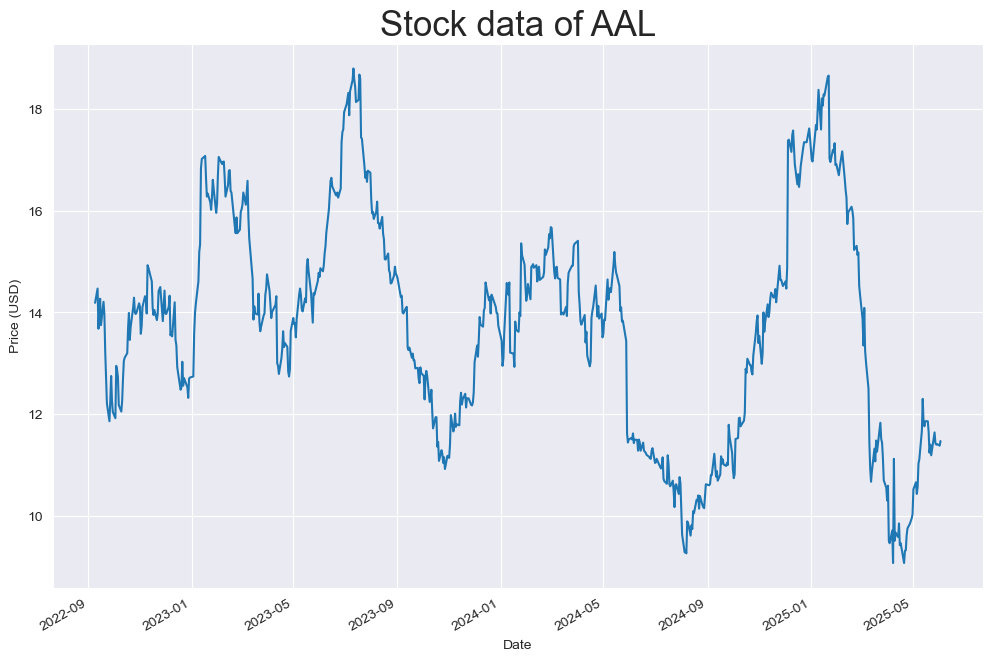

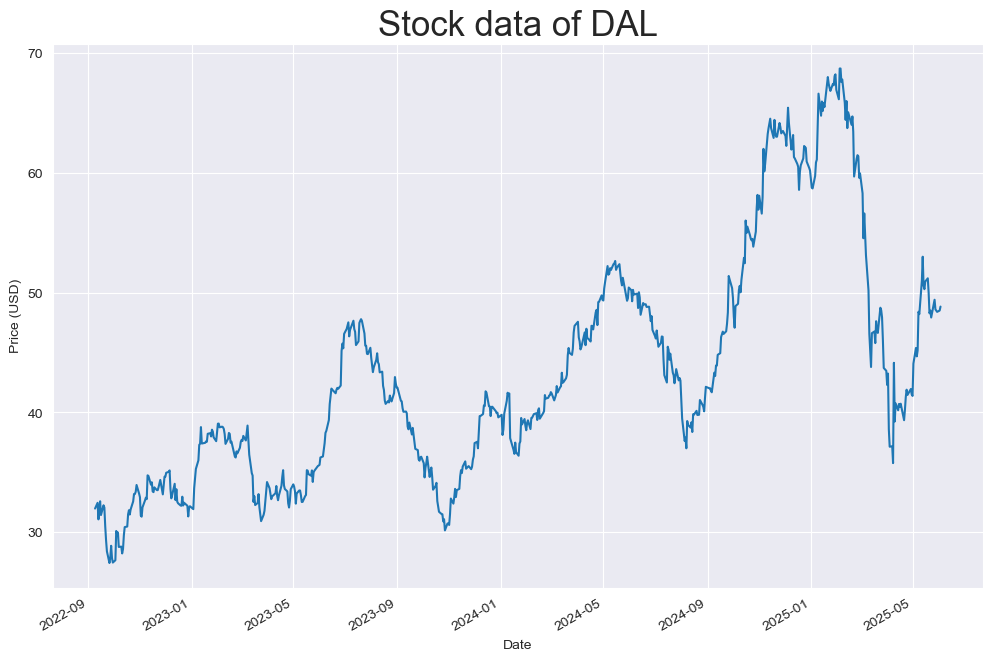

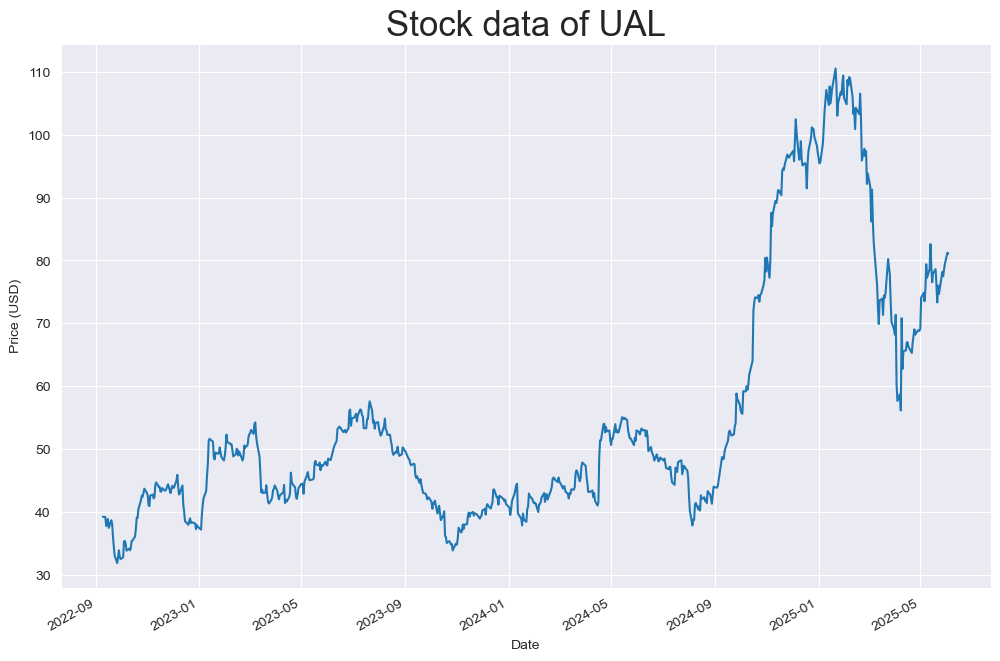

In [4]:
ticker = 'AAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'DAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'UAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [27]:
# Use historical data to estimate std deviation of log returns
AA_log_returns = np.log(stock['Close']['AAL']/stock['Close']['AAL'].shift(1))
AA_log_returns = AA_log_returns.dropna()
AA_log_returns_values = AA_log_returns.values
AAsigma = np.std(AA_log_returns_values)

UA_log_returns = np.log(stock['Close']['UAL']/stock['Close']['UAL'].shift(1))
UA_log_returns = UA_log_returns.dropna()
UA_log_returns_values = UA_log_returns.values
UAsigma = np.std(UA_log_returns_values)

DL_log_returns = np.log(stock['Close']['DAL']/stock['Close']['DAL'].shift(1))
DL_log_returns = DL_log_returns.dropna()
DL_log_returns_values = DL_log_returns.values
DLsigma = np.std(DL_log_returns_values)



#Set starting value of simulated stocks to be last closing price of S&P

AAS0 = stock['Close']['AAL'].iloc[-1]
UAS0 = stock['Close']['UAL'].iloc[-1]
DLS0 = stock['Close']['DAL'].iloc[-1]

In [28]:
AA_log_returns_values

array([ 0.0195401 , -0.05614262,  0.02526294,  0.01696159, -0.03712064,
        0.03290712, -0.01703375, -0.05442525, -0.04009786, -0.0401338 ,
       -0.02908393,  0.03398593,  0.03837398, -0.04000533, -0.0172915 ,
       -0.01001677,  0.08287811, -0.00619676, -0.01093764, -0.04416609,
       -0.01073061,  0.01727727,  0.03526003,  0.02718617,  0.00458712,
        0.00684154,  0.037179  ,  0.02094695, -0.03862045,  0.01840317,
        0.02804933,  0.01338516, -0.02050266, -0.00214514,  0.00214514,
        0.01277521, -0.0049488 , -0.03828563,  0.01098507,  0.02730056,
        0.0147734 , -0.00490023, -0.0191292 ,  0.06574493, -0.00335459,
       -0.01353199, -0.00477984, -0.03624087, -0.00998584,  0.00714291,
       -0.01433715,  0.00934244,  0.03098843,  0.00553251, -0.04730851,
        0.02216754,  0.02030171, -0.03168169, -0.00071551,  0.00997155,
        0.01547149, -0.05596868,  0.00368326, -0.0051604 ,  0.04833253,
       -0.05351962, -0.00820591, -0.0319662 , -0.00932407, -0.02

In [29]:
UA_log_returns_values

array([-1.01929420e-03, -3.71423103e-02,  1.67938709e-02,  1.21558773e-02,
       -3.71868447e-02,  3.20321746e-02, -1.37898010e-02, -5.52031198e-02,
       -4.73376794e-02, -4.08825018e-02, -3.60205199e-02,  2.87367895e-02,
        3.26619697e-02, -3.02281986e-02, -1.16138554e-02,  8.57068587e-03,
        7.39991244e-02,  2.54406746e-03, -1.30720561e-02, -3.19701299e-02,
        9.99127165e-03, -7.92607859e-03,  8.80285138e-03,  3.36094241e-02,
        1.97543996e-03,  1.76055199e-02,  3.13591218e-02,  4.84704831e-02,
       -1.27957122e-03,  3.49765034e-02,  3.49890513e-02,  1.70458060e-02,
       -3.52728673e-03,  1.26406388e-02,  1.68381217e-02, -1.47467964e-02,
       -9.79718533e-03, -3.70102937e-02, -3.89958683e-03,  3.99717727e-02,
        3.74707351e-03, -1.41244928e-02,  4.49435714e-03,  4.52211506e-02,
        8.53547971e-03, -1.53259777e-02,  2.27140600e-04, -1.71766500e-02,
       -9.24449225e-04,  1.30930938e-02, -8.93987363e-03,  0.00000000e+00,
        5.96875796e-03,  

In [30]:
DL_log_returns_values

array([ 1.48915262e-02, -4.34649574e-02,  2.85734312e-02,  1.88054848e-02,
       -3.57889908e-02,  2.55200165e-02, -5.78467691e-03, -4.97677325e-02,
       -3.92720516e-02, -3.18778988e-02, -3.50667309e-02,  1.69854325e-02,
        3.41472344e-02, -3.62546856e-02, -1.34514688e-02,  7.10233530e-03,
        8.44426150e-02, -7.50780330e-03,  3.27126247e-03, -4.09990132e-02,
        1.02015340e-03, -1.99113085e-02,  1.27477491e-02,  3.92733236e-02,
        2.27800722e-02,  1.60756034e-03,  3.28622387e-02,  1.08211438e-02,
       -1.14428434e-02,  1.32860746e-02,  2.09575879e-02,  1.87587607e-02,
        0.00000000e+00,  5.58910342e-03,  1.68705374e-02, -2.15748599e-02,
       -8.88115055e-03, -4.78094366e-02, -2.81120313e-03,  2.44101753e-02,
        1.81494036e-02,  6.87084056e-03, -3.87776681e-03,  5.89004132e-02,
       -1.40992978e-03, -2.13897931e-02,  6.03561457e-03, -2.26032213e-02,
       -1.76013562e-03,  1.19659819e-02, -6.98705021e-03,  0.00000000e+00,
        7.56686202e-03,  

In [31]:
len(AA_log_returns_values),len(DL_log_returns_values),len(UA_log_returns_values)

(684, 684, 684)

We create normal distributions with the same mean and variance observed by the given airline data.

In [33]:
AAmean=np.mean(AA_log_returns)

In [32]:
UAmean=np.mean(UA_log_returns)

In [34]:
DLmean=np.mean(DL_log_returns)

In [36]:
AAnormals=[]
for i in range(684):
    AAnormals.append(np.random.normal(AAmean,AAsigma))

UAnormals=[]
for i in range(684):
    UAnormals.append(np.random.normal(UAmean,UAsigma))

DLnormals=[]
for i in range(684):
    DLnormals.append(np.random.normal(DLmean,DLsigma))


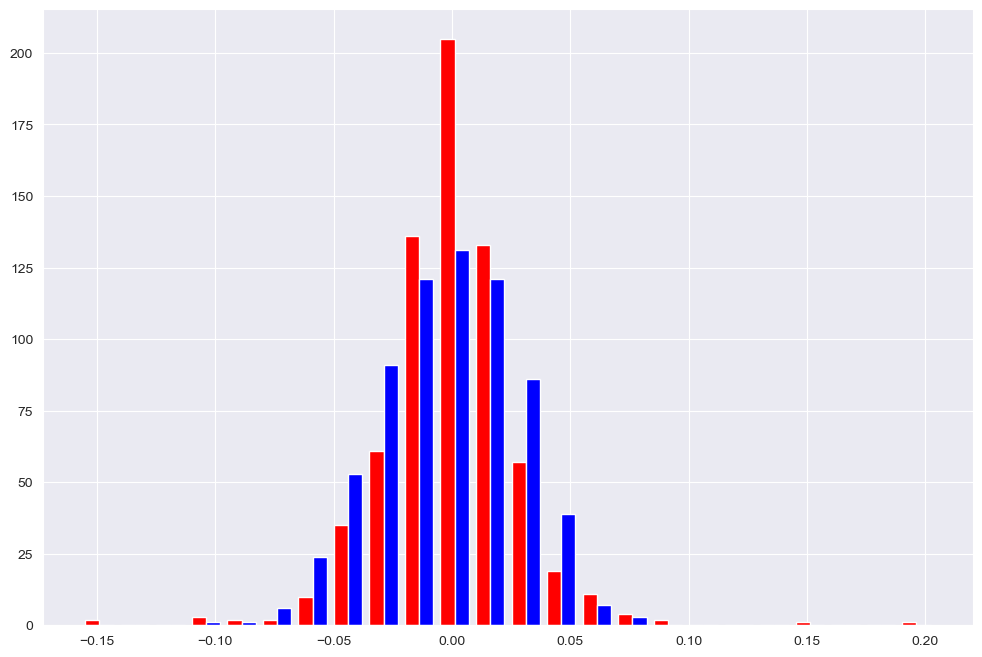

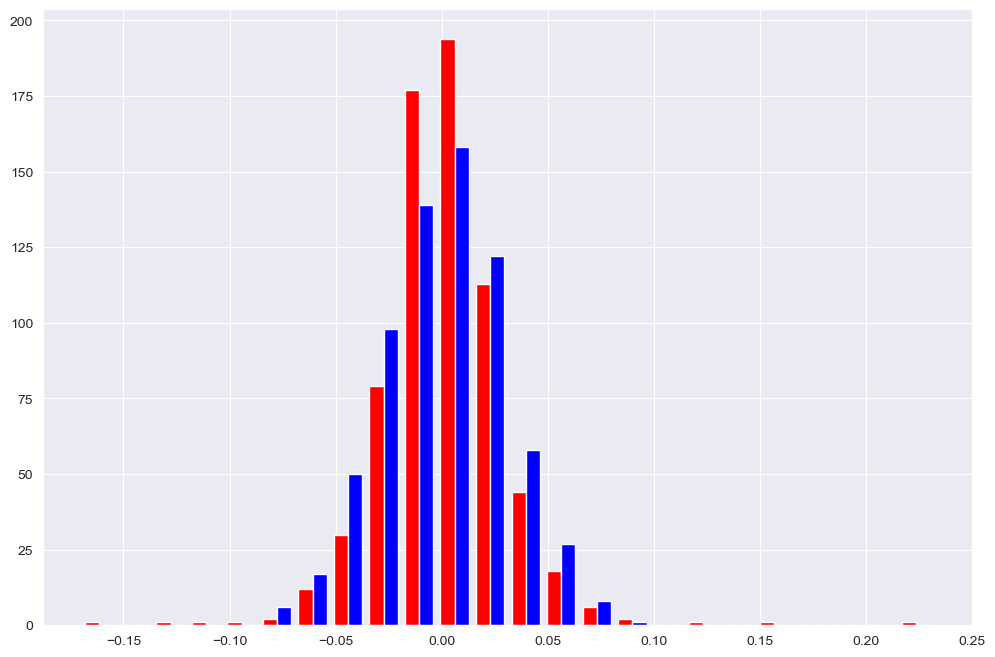

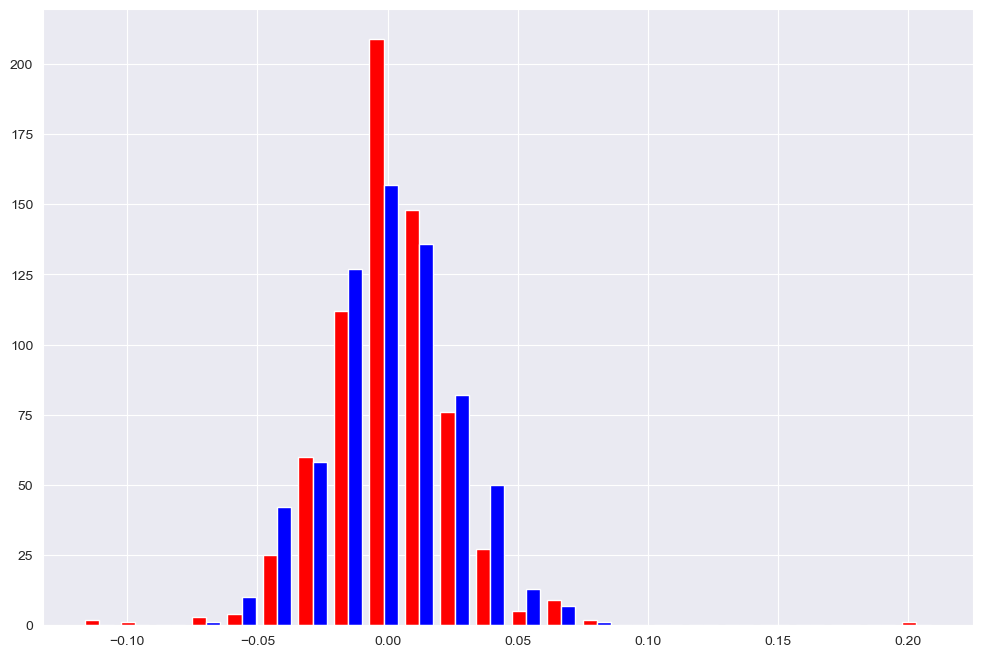

In [37]:
aafig, aaax = plt.subplots(figsize=(12,8))

aaax.hist([AA_log_returns_values,AAnormals],24,color=['red','blue'])
plt.show()

uafig, uaax = plt.subplots(figsize=(12,8))

uaax.hist([UA_log_returns_values,UAnormals],24,color=['red','blue'])
plt.show()

dlfig, dlax = plt.subplots(figsize=(12,8))

dlax.hist([DL_log_returns_values,DLnormals],24,color=['red','blue'])
plt.show()

From what I can tell, the log-returns seem generally further skewed toward the center than what would be considered normal (low kurtosis), despite the given standard deviation. This is likely due to a few outliers. American is worst, Delta is best, at looking normal.

Is there a period of 90 days (on average, 62 trading days) for which it is more normalized? We will split the data for the past 999 days into eleven "seasons" and investigate.

[*********************100%***********************]  3 of 3 completed


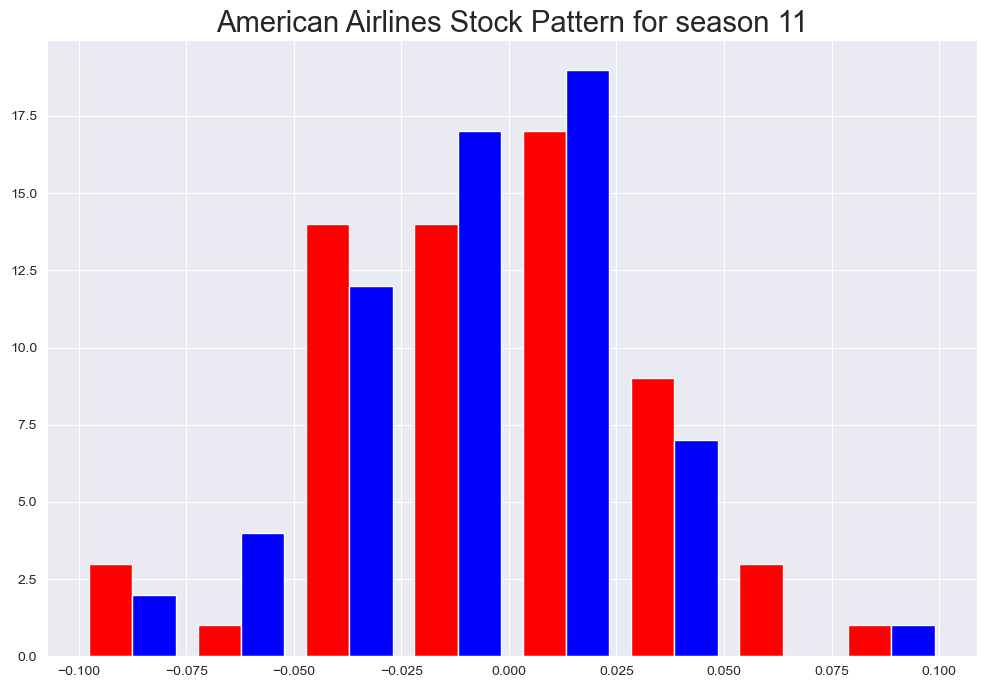

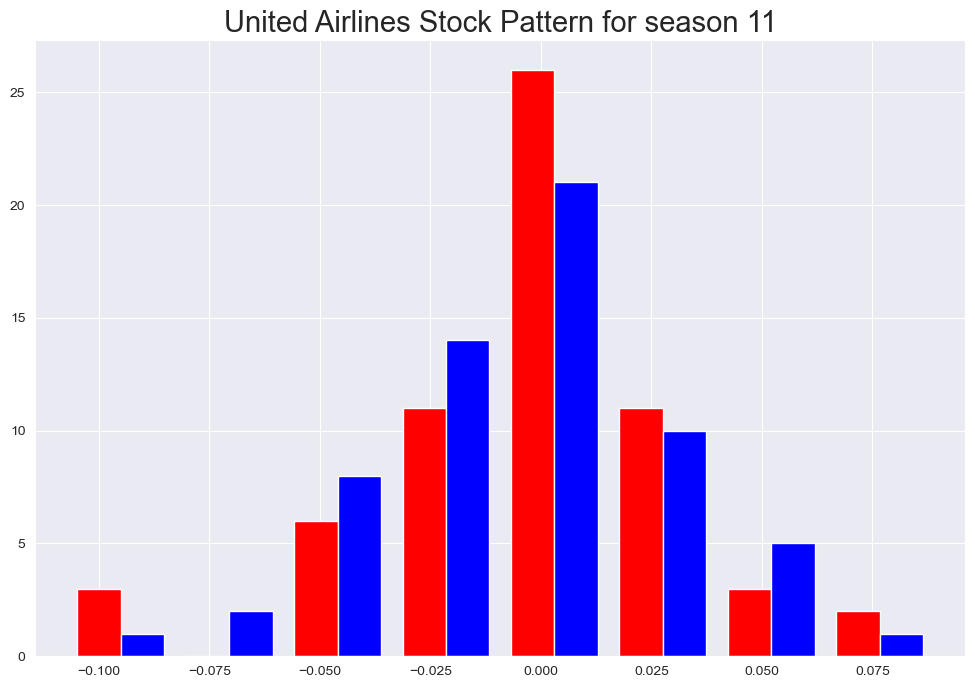

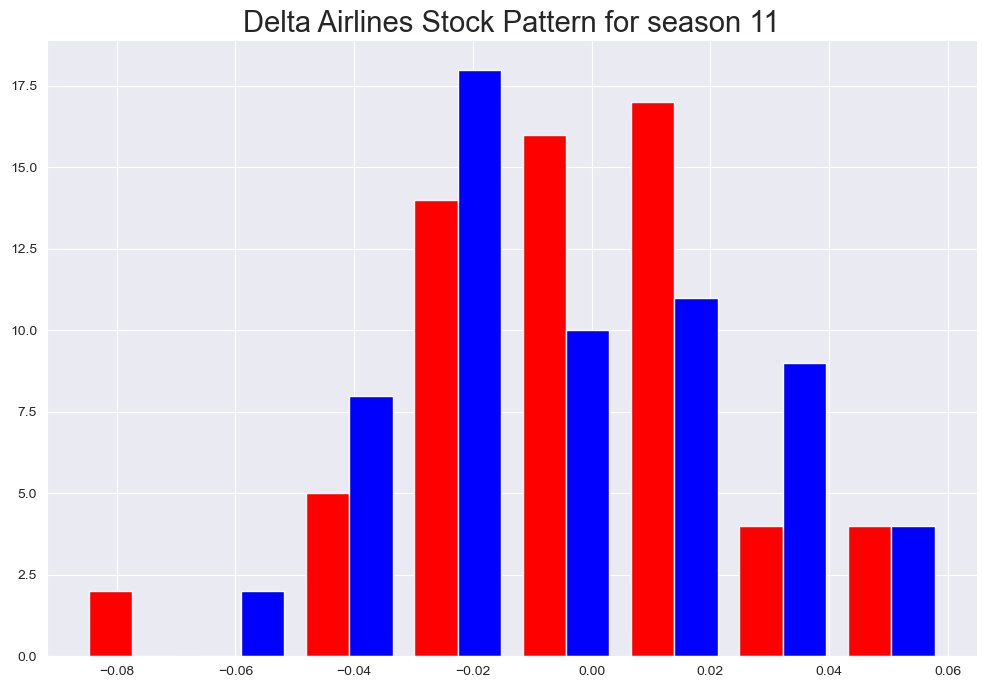

In [62]:
tickers = ['AAL','UAL','DAL']

for n in range(11,12):

    start_date = dt.datetime.today()-dt.timedelta(days = 91*(n+1))
    end_date = dt.datetime.today()-dt.timedelta(days=91*n)
    
    stock = yf.download(tickers, start = start_date, end =end_date)
    
    AA_log_returns = np.log(stock['Close']['AAL']/stock['Close']['AAL'].shift(1))
    AA_log_returns = AA_log_returns.dropna()
    AA_log_returns_values = AA_log_returns.values
    AAsigma = np.std(AA_log_returns_values)
    
    UA_log_returns = np.log(stock['Close']['UAL']/stock['Close']['UAL'].shift(1))
    UA_log_returns = UA_log_returns.dropna()
    UA_log_returns_values = UA_log_returns.values
    UAsigma = np.std(UA_log_returns_values)
    
    DL_log_returns = np.log(stock['Close']['DAL']/stock['Close']['DAL'].shift(1))
    DL_log_returns = DL_log_returns.dropna()
    DL_log_returns_values = DL_log_returns.values
    DLsigma = np.std(DL_log_returns_values)
    
    
    
    #Set starting value of simulated stocks to be last closing price of S&P
    
    AAS0 = stock['Close']['AAL'].iloc[-1]
    UAS0 = stock['Close']['UAL'].iloc[-1]
    DLS0 = stock['Close']['DAL'].iloc[-1]
    
    AAmean=np.mean(AA_log_returns)
    UAmean=np.mean(UA_log_returns)
    DLmean=np.mean(DL_log_returns)
    
    AAnormals=[]
    for i in range(len(AA_log_returns)):
        AAnormals.append(np.random.normal(AAmean,AAsigma))
    
    UAnormals=[]
    for i in range(len(AA_log_returns)):
        UAnormals.append(np.random.normal(UAmean,UAsigma))
    
    DLnormals=[]
    for i in range(len(AA_log_returns)):
        DLnormals.append(np.random.normal(DLmean,DLsigma))
    
    aafig, aaax = plt.subplots(figsize=(12,8))
    
    aaax.hist([AA_log_returns_values,AAnormals],8,color=['red','blue'])
    plt.title(f"American Airlines Stock Pattern for season {n}", size=21)
    plt.show()
    
    uafig, uaax = plt.subplots(figsize=(12,8))
    
    uaax.hist([UA_log_returns_values,UAnormals],8,color=['red','blue'])
    plt.title(f"United Airlines Stock Pattern for season {n}", size=21)
    plt.show()
    
    dlfig, dlax = plt.subplots(figsize=(12,8))
    
    dlax.hist([DL_log_returns_values,DLnormals],8,color=['red','blue'])
    plt.title(f"Delta Airlines Stock Pattern for season {n}", size=21)
    plt.show()

Each period represents 91 days (one quarter of a year), and represents a season of travel. I went back 3 years only, since data from before Spring 2022 is likely to be skewed by the COVID pandemic.

After looking at all the data sets for $n=0$ through $n=11$, I noticed a few patterns. By counting the number of individual days by which the normal histogram and the measured values deviate, I noticed that Delta Airlines is the most consistently near normal. American Airlines is comparable to Delta the most times, but in seasons "3" (Summer '24) and "4" (Spring '24) there were severe outliers. There also seemed to be surprisingly little correlation between the normalities of the three airlines. This is unusual as they are direct competitors of each other. Finally, within the last year, United has shown strong deviations from the norm. This is likely due to several difficulties (e.g. air traffic control and weather problems in Newark and other places) that the airline has bounced back from somewhat quickly.